In [1]:
import pandas as pd

In [ ]:
read_path = '../../measuring_forgetting/notebooks/output/goodreads_dump/pos_rates_only/sample_2012-07_until_2015-01/'
base_filename = 'inter_dedup_coldstart_3stars_4x714k'

In [3]:
df_inter = pd.read_csv(read_path+base_filename+'_interactions_df.csv', index_col=0)
df_inter

,user_id,book_id,timestamp,date
205,8842281e1d1347389f2ab93d60773d4d,25019,1.420088e+09,2015-01-01
216,8842281e1d1347389f2ab93d60773d4d,1969280,1.414814e+09,2014-11-01
217,8842281e1d1347389f2ab93d60773d4d,17290220,1.414814e+09,2014-11-01
219,8842281e1d1347389f2ab93d60773d4d,6882,1.412136e+09,2014-10-01
220,8842281e1d1347389f2ab93d60773d4d,6954929,1.412136e+09,2014-10-01
...,...,...,...,...
2856847,339dfe8faf01cc7080240644db9ecaec,6070950,1.343794e+09,2012-08-01
2856848,339dfe8faf01cc7080240644db9ecaec,5598113,1.343794e+09,2012-08-01
2856849,339dfe8faf01cc7080240644db9ecaec,12881778,1.343794e+09,2012-08-01
2856850,339dfe8faf01cc7080240644db9ecaec,11857408,1.343794e+09,2012-08-01


In [4]:
# rename columns
df_inter.columns = ['user_id', 'item_id', 'timestamp', 'date']

In [5]:
df_inter.dtypes

user_id       object
item_id        int64
timestamp    float64
date          object
dtype: object

In [6]:
df_inter['date'] = df_inter['date'].apply(pd.Timestamp)
df_inter.sort_values(by='date', inplace=True)
df_inter.head()

,user_id,item_id,timestamp,date
1628474,527affacb717f6171b3ab99f8e2e8cd9,33737,1.341115e+09,2012-07-01
1350291,9984a4a10a9800da048f957972784fa0,6930014,1.341115e+09,2012-07-01
1350299,9984a4a10a9800da048f957972784fa0,13528488,1.341115e+09,2012-07-01
1975047,f1bf9f422038df63c5eb398dd2192513,9410421,1.341115e+09,2012-07-01
1975046,f1bf9f422038df63c5eb398dd2192513,8525590,1.341115e+09,2012-07-01


In [7]:
df_inter.dtypes

user_id              object
item_id               int64
timestamp           float64
date         datetime64[ns]
dtype: object

In [10]:
df_inter["date"].dt.to_period("M").unique()  # Extract semesters

<PeriodArray>
['2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01',
 '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08',
 '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03',
 '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10',
 '2014-11', '2014-12', '2015-01']
Length: 31, dtype: period[M]

In [11]:
df_inter["date"].dt.to_period("Q").unique()

<PeriodArray>
['2012Q3', '2012Q4', '2013Q1', '2013Q2', '2013Q3', '2013Q4', '2014Q1',
 '2014Q2', '2014Q3', '2014Q4', '2015Q1']
Length: 11, dtype: period[Q-DEC]

In [18]:
df_inter["date"].dt.to_period("Q").unique()

<PeriodArray>
['2012Q3', '2012Q4', '2013Q1', '2013Q2', '2013Q3', '2013Q4', '2014Q1',
 '2014Q2', '2014Q3', '2014Q4', '2015Q1']
Length: 11, dtype: period[Q-DEC]

In [8]:
df_inter["quarter"] = df_inter["date"].dt.to_period("Q")  # Extract quarter-year
# https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-period-aliases

In [9]:
# # Sample dataset
# # df = pd.read_csv("your_data.csv")
# # Assuming df has columns: 'user_id', 'item_id', 'timestamp'
# # df_inter["timestamp"] = pd.to_datetime(df_inter["timestamp"])
# df_inter["quarter"] = df_inter["date"].dt.to_period("Q")  # Extract quarter-year

# # Basic statistics
# num_users = df_inter["user_id"].nunique()
# num_items = df_inter["item_id"].nunique()
# total_interactions = len(df_inter)
# avg_interactions_per_user = total_interactions / num_users

# # Interactions per user per quarter
# interactions_per_user_quarter = df_inter.groupby(["user_id", "quarter"]).size().reset_index(name="interaction_count")
# avg_interactions_per_user_per_quarter = interactions_per_user_quarter["interaction_count"].mean()

# # Users only present in one quarter
# users_per_quarter = df_inter.groupby("user_id")["quarter"].nunique()
# users_in_one_quarter = (users_per_quarter == 1).sum()

# # Print statistics
# print("Number of users:", num_users)
# print("Number of items:", num_items)
# print("Average number of interactions per user:", avg_interactions_per_user)
# print("Average number of interactions per user per quarter:", avg_interactions_per_user_per_quarter)
# print("Number of users only present in one quarter:", users_in_one_quarter)

# # Additional recommendations for recommender system statistics
# additional_stats = {
#     "Median interactions per user": df_inter.groupby("user_id").size().median(),
#     "Sparsity of interactions": 1 - (total_interactions / (num_users * num_items)),
#     "User activity distribution": df_inter.groupby("user_id").size().describe(),
#     "Item popularity distribution": df_inter.groupby("item_id").size().describe(),
#     "New users per quarter": df_inter.groupby("quarter")["user_id"].nunique().describe(),
#     "New items per quarter": df_inter.groupby("quarter")["item_id"].nunique().describe(),
#     "Repeat engagement rate": df_inter.groupby("user_id")["item_id"].nunique().mean(),
#     # "Session-based trends": df_inter.groupby(df_inter["date"].dt.date).size().describe(),
#     "Quarter-based trends": df_inter.groupby(df_inter["quarter"]).size().describe(),
#     "User retention rates": df_inter.groupby("user_id")["quarter"].nunique().value_counts(normalize=True),
# }

# print("\nAdditional Recommender System Statistics:")
# for stat, value in additional_stats.items():
#     print(f"{stat}:\n{value}\n")

In [10]:
# # User retention rates
# user_retention = users_per_quarter.value_counts(normalize=True).sort_index()

# # Plot user retention rates
# plt.figure(figsize=(8, 5))
# plt.bar(user_retention.index, user_retention.values, color='skyblue')
# plt.xlabel("Number of Quarters Active")
# plt.ylabel("Proportion of Users")
# plt.title("User Retention Rates")
# plt.xticks(user_retention.index)
# plt.show()

In [11]:
# temp = pd.DataFrame({
#     'user_id':['u1', 'u1', 'u2', 'u3', #users 1,2,3,4,5,6
#                'u1', 'u4', 'u4', 'u5',
#                'u1', 'u1', 'u2', 'u6',
#                'u1', 'u1', 'u3', 'u3'],
#     'item_id':['a', 'b', 'c', 'a',
#                'c', 'a', 'b', 'd',
#                'd', 'e', 'a', 'a',
#                'b', 'd', 'b', 'c'],
#     'quarter':['2012Q1','2012Q1','2012Q1','2012Q1',
#                '2012Q2','2012Q2','2012Q2','2012Q2',
#                '2012Q3','2012Q3','2012Q3','2012Q3',
#                '2012Q4','2012Q4','2012Q4','2012Q4']
# })


# # Basic statistics
# num_users = temp["user_id"].nunique()
# num_items = temp["item_id"].nunique()
# total_interactions = len(temp)
# avg_interactions_per_user = total_interactions / num_users

# # Interactions per user per quarter
# interactions_per_user_quarter = temp.groupby(["user_id", "quarter"]).size().reset_index(name="interaction_count")
# avg_interactions_per_user_per_quarter = interactions_per_user_quarter["interaction_count"].mean()

# # Users only present in one quarter
# users_per_quarter = temp.groupby("user_id")["quarter"].nunique()
# users_in_one_quarter = (users_per_quarter == 1).sum()

# # Print statistics
# print("Number of users:", num_users)
# print("Number of items:", num_items)
# print("Average number of interactions per user:", avg_interactions_per_user)
# print("Average number of interactions per user per quarter:", avg_interactions_per_user_per_quarter)
# print("Number of users only present in one quarter:", users_in_one_quarter)

# # Additional recommendations for recommender system statistics
# additional_stats = {
#     "Median interactions per user": temp.groupby("user_id").size().median(),
#     "Sparsity of interactions": 1 - (total_interactions / (num_users * num_items)),
#     "User activity distribution": temp.groupby("user_id").size().describe(),
#     "Item popularity distribution": temp.groupby("item_id").size().describe(),
#     "New users per quarter": temp.groupby("quarter")["user_id"].nunique().describe(),
#     "New items per quarter": temp.groupby("quarter")["item_id"].nunique().describe(),
#     "Repeat engagement rate": temp.groupby("user_id")["item_id"].nunique().mean(),
#     # "Session-based trends": df_inter.groupby(df_inter["date"].dt.date).size().describe(),
#     "Quarter-based trends": temp.groupby(temp["quarter"]).size().describe(),
#     # "User retention rates": temp.groupby("user_id")["quarter"].nunique().value_counts(normalize=True),
# }

# print("\nAdditional Recommender System Statistics:")
# for stat, value in additional_stats.items():
#     print(f"{stat}:\n{value}\n")

recall@20=1
recall@1=0.6833

it means all users (or most) have all items in the list and have too little interactions, average 1.46
so it means there's only 1 more relevant interaction, skyrocketing the recall metric when there are so many opportunities (20) to include it on the rec list


approaches to solve problem:

1) filter out users with less than 8 interactions (it changes the data distribution)

if k=20, and relevant items are 8, recall@20 can be 1/8 or 1




In [ ]:
df_inter

,user_id,item_id,timestamp,date,quarter
1628474,527affacb717f6171b3ab99f8e2e8cd9,33737,1.341115e+09,2012-07-01,2012Q3
1350291,9984a4a10a9800da048f957972784fa0,6930014,1.341115e+09,2012-07-01,2012Q3
1350299,9984a4a10a9800da048f957972784fa0,13528488,1.341115e+09,2012-07-01,2012Q3
1975047,f1bf9f422038df63c5eb398dd2192513,9410421,1.341115e+09,2012-07-01,2012Q3
1975046,f1bf9f422038df63c5eb398dd2192513,8525590,1.341115e+09,2012-07-01,2012Q3
...,...,...,...,...,...
1423285,5c179d5457bf229c8799f0e2a2a7bc35,1217100,1.420088e+09,2015-01-01,2015Q1
1424258,5ef6dab826848245fef307931436e4be,18126198,1.420088e+09,2015-01-01,2015Q1
1424259,5ef6dab826848245fef307931436e4be,13335037,1.420088e+09,2015-01-01,2015Q1
1422562,4fcbb2ee46b6fd159450471a24893da5,20312459,1.420088e+09,2015-01-01,2015Q1


In [ ]:
df_inter[['user_id', 'quarter']].groupby(['quarter', 'user_id']).size()#.mean()

quarter  user_id                         
2012Q3   001aa4da5b2c1c53765b168224c7f106      2
         002e4cdbb30a0fd5c00ef486c6e3bd6b     33
         00331de137bbbda874c4c4463a46bb32      8
         004f6d189c4546a39db2162986c0d9e1    137
         00533a61db8ca4525e160f853c22ce5f      4
                                            ... 
2015Q1   ff4ed175e424528f64ea534d6fedc5b4      9
         ff5c5de14d2edd9055f86c43de19860b      3
         ff6df5640dc4cb5ccaf73dac0462612d      4
         ffd0aba8d59263c2d541c22f7ecad571      1
         ffeca3c2b7d21f3b57b0b7c3cfe86c5d      4
Length: 32582, dtype: int64

<AxesSubplot:xlabel='quarter,user_id'>

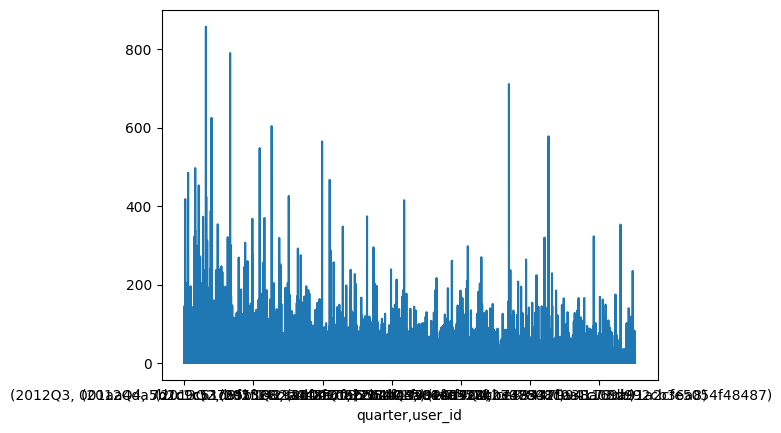

In [14]:
df_inter[['user_id', 'quarter']].groupby(['quarter', 'user_id']).size().plot()

In [15]:
# df_inter[['user_id', 'quarter']].groupby(['quarter']).describe() # this one would in fact not yield what i want
# df_inter[['user_id', 'quarter']].groupby(['quarter']).size().median()

In [16]:
quarter_inter = df_inter[['user_id', 'quarter']].groupby(['quarter', 'user_id']).size()#.groupby('quarter').describe()
quarter_inter

quarter  user_id                         
2012Q3   001aa4da5b2c1c53765b168224c7f106      2
         002e4cdbb30a0fd5c00ef486c6e3bd6b     33
         00331de137bbbda874c4c4463a46bb32      8
         004f6d189c4546a39db2162986c0d9e1    137
         00533a61db8ca4525e160f853c22ce5f      4
                                            ... 
2015Q1   ff4ed175e424528f64ea534d6fedc5b4      9
         ff5c5de14d2edd9055f86c43de19860b      3
         ff6df5640dc4cb5ccaf73dac0462612d      4
         ffd0aba8d59263c2d541c22f7ecad571      1
         ffeca3c2b7d21f3b57b0b7c3cfe86c5d      4
Length: 32582, dtype: int64

In [17]:
quarter_inter.groupby('quarter').median()

quarter
2012Q3    8.0
2012Q4    6.0
2013Q1    6.0
2013Q2    5.0
2013Q3    5.0
2013Q4    4.0
2014Q1    5.0
2014Q2    5.0
2014Q3    5.0
2014Q4    4.0
2015Q1    2.0
Freq: Q-DEC, dtype: float64

In [18]:
quarter_inter.groupby('quarter').mean()

quarter
2012Q3    21.722350
2012Q4    14.376830
2013Q1    14.229408
2013Q2    12.349332
2013Q3    11.414863
2013Q4     9.822724
2014Q1    10.965194
2014Q2    10.246382
2014Q3    10.095570
2014Q4     9.191187
2015Q1     5.597332
Freq: Q-DEC, dtype: float64

In [19]:
quarter_inter.groupby('quarter').describe()

,count,mean,std,min,25%,50%,75%,max
quarter,,,,,,,,
2012Q3,3472.0,21.722350,44.791133,1.0,3.0,8.0,22.25,857.0
2012Q4,3142.0,14.376830,29.285973,1.0,2.0,6.0,15.00,604.0
2013Q1,3278.0,14.229408,25.162150,1.0,2.0,6.0,15.00,426.0
2013Q2,3146.0,12.349332,25.097869,1.0,2.0,5.0,12.00,565.0
2013Q3,3095.0,11.414863,21.977741,1.0,2.0,5.0,11.00,415.0
2013Q4,2922.0,9.822724,16.364453,1.0,2.0,4.0,10.00,217.0
2014Q1,2988.0,10.965194,20.303179,1.0,2.0,5.0,11.00,298.0
2014Q2,2902.0,10.246382,21.630988,1.0,2.0,5.0,11.00,711.0
2014Q3,2867.0,10.095570,20.825345,1.0,2.0,5.0,11.00,578.0


In [20]:
quarter_inter = quarter_inter.reset_index(name='n_inter')
quarter_inter

,quarter,user_id,n_inter
0,2012Q3,001aa4da5b2c1c53765b168224c7f106,2
1,2012Q3,002e4cdbb30a0fd5c00ef486c6e3bd6b,33
2,2012Q3,00331de137bbbda874c4c4463a46bb32,8
3,2012Q3,004f6d189c4546a39db2162986c0d9e1,137
4,2012Q3,00533a61db8ca4525e160f853c22ce5f,4
...,...,...,...
32577,2015Q1,ff4ed175e424528f64ea534d6fedc5b4,9
32578,2015Q1,ff5c5de14d2edd9055f86c43de19860b,3
32579,2015Q1,ff6df5640dc4cb5ccaf73dac0462612d,4
32580,2015Q1,ffd0aba8d59263c2d541c22f7ecad571,1


In [21]:
quarter_inter.dtypes

quarter    period[Q-DEC]
user_id           object
n_inter            int64
dtype: object

In [22]:
quarter_inter.quarter.value_counts().sort_index()

quarter
2012Q3    3472
2012Q4    3142
2013Q1    3278
2013Q2    3146
2013Q3    3095
2013Q4    2922
2014Q1    2988
2014Q2    2902
2014Q3    2867
2014Q4    2746
2015Q1    2024
Freq: Q-DEC, Name: count, dtype: int64

In [23]:
# potentially to remove
quarter_inter.loc[quarter_inter['n_inter']==1, ['quarter']].value_counts().sort_index()

quarter
2012Q3     425
2012Q4     539
2013Q1     499
2013Q2     516
2013Q3     560
2013Q4     569
2014Q1     559
2014Q2     543
2014Q3     560
2014Q4     555
2015Q1     637
Name: count, dtype: int64

In [24]:
quarter_inter.loc[quarter_inter['n_inter']==1, ['quarter']].value_counts().sum()

5962

In [25]:
quarter_inter.loc[quarter_inter['n_inter']>1, ['quarter']].value_counts().sort_index()

quarter
2012Q3     3047
2012Q4     2603
2013Q1     2779
2013Q2     2630
2013Q3     2535
2013Q4     2353
2014Q1     2429
2014Q2     2359
2014Q3     2307
2014Q4     2191
2015Q1     1387
Name: count, dtype: int64

In [26]:
quarter_inter.loc[:, 'user_id'].nunique()

5204

In [27]:
quarter_inter.loc[quarter_inter['n_inter']==1, 'user_id'].nunique()

3245

In [28]:
quarter_inter.loc[quarter_inter['n_inter']>1, 'user_id'].nunique()

5034

In [ ]:
list_users_more_1_interaction = list(quarter_inter.loc[quarter_inter['n_inter']>1, 'user_id'].unique())
len(list_users_more_1_interaction)

5034

In [30]:
list_users_1_interaction = list(quarter_inter.loc[quarter_inter['n_inter']==1, 'user_id'].unique())
len(list_users_1_interaction)

3245

In [31]:
quarter_inter.user_id.nunique()

5204

In [32]:
df_inter.user_id.nunique()

5204

In [33]:
sampled_df = df_inter.loc[df_inter.user_id.isin(list_users_more_1_interaction)].reset_index(drop=True)
sampled_df

,user_id,item_id,timestamp,date,quarter
0,527affacb717f6171b3ab99f8e2e8cd9,33737,1.341115e+09,2012-07-01,2012Q3
1,9984a4a10a9800da048f957972784fa0,6930014,1.341115e+09,2012-07-01,2012Q3
2,9984a4a10a9800da048f957972784fa0,13528488,1.341115e+09,2012-07-01,2012Q3
3,f1bf9f422038df63c5eb398dd2192513,9410421,1.341115e+09,2012-07-01,2012Q3
4,f1bf9f422038df63c5eb398dd2192513,8525590,1.341115e+09,2012-07-01,2012Q3
...,...,...,...,...,...
397836,5c179d5457bf229c8799f0e2a2a7bc35,1217100,1.420088e+09,2015-01-01,2015Q1
397837,5ef6dab826848245fef307931436e4be,18126198,1.420088e+09,2015-01-01,2015Q1
397838,5ef6dab826848245fef307931436e4be,13335037,1.420088e+09,2015-01-01,2015Q1
397839,4fcbb2ee46b6fd159450471a24893da5,20312459,1.420088e+09,2015-01-01,2015Q1


In [ ]:
sampled_df.user_id.nunique()

5034

In [35]:
sampled_df2 = df_inter.loc[~df_inter.user_id.isin(list_users_1_interaction)].reset_index(drop=True)
sampled_df2

,user_id,item_id,timestamp,date,quarter
0,527affacb717f6171b3ab99f8e2e8cd9,33737,1.341115e+09,2012-07-01,2012Q3
1,f1bf9f422038df63c5eb398dd2192513,9410421,1.341115e+09,2012-07-01,2012Q3
2,f1bf9f422038df63c5eb398dd2192513,8525590,1.341115e+09,2012-07-01,2012Q3
3,a8ccafefd08a1d25bfde00d8666a409e,1162543,1.341115e+09,2012-07-01,2012Q3
4,a8ccafefd08a1d25bfde00d8666a409e,24178,1.341115e+09,2012-07-01,2012Q3
...,...,...,...,...,...
221596,0c16693cbe75b246ef93e679014ef1aa,13635342,1.420088e+09,2015-01-01,2015Q1
221597,0c16693cbe75b246ef93e679014ef1aa,14889780,1.420088e+09,2015-01-01,2015Q1
221598,0c16693cbe75b246ef93e679014ef1aa,12922320,1.420088e+09,2015-01-01,2015Q1
221599,0c16693cbe75b246ef93e679014ef1aa,21094993,1.420088e+09,2015-01-01,2015Q1


In [36]:
sampled_df2.user_id.nunique()

1959

In [37]:
_sdf = sampled_df[['user_id', 'quarter']].groupby(['quarter', 'user_id']).size().reset_index(name='n_inter')
_sdf

,quarter,user_id,n_inter
0,2012Q3,001aa4da5b2c1c53765b168224c7f106,2
1,2012Q3,002e4cdbb30a0fd5c00ef486c6e3bd6b,33
2,2012Q3,00331de137bbbda874c4c4463a46bb32,8
3,2012Q3,004f6d189c4546a39db2162986c0d9e1,137
4,2012Q3,00533a61db8ca4525e160f853c22ce5f,4
...,...,...,...
32289,2015Q1,ff4ed175e424528f64ea534d6fedc5b4,9
32290,2015Q1,ff5c5de14d2edd9055f86c43de19860b,3
32291,2015Q1,ff6df5640dc4cb5ccaf73dac0462612d,4
32292,2015Q1,ffd0aba8d59263c2d541c22f7ecad571,1


In [38]:
_sdf.loc[_sdf['n_inter']==1, 'quarter'].value_counts().sort_index()

quarter
2012Q3    371
2012Q4    510
2013Q1    467
2013Q2    493
2013Q3    537
2013Q4    548
2014Q1    535
2014Q2    520
2014Q3    532
2014Q4    534
2015Q1    627
Freq: Q-DEC, Name: count, dtype: int64

In [39]:
_sdf.loc[_sdf['n_inter']==1, 'quarter']#.sort_index()

9        2012Q3
23       2012Q3
39       2012Q3
72       2012Q3
78       2012Q3
          ...  
32275    2015Q1
32278    2015Q1
32282    2015Q1
32284    2015Q1
32292    2015Q1
Name: quarter, Length: 5674, dtype: period[Q-DEC]

In [40]:
_sdf2 = sampled_df2[['user_id', 'quarter']].groupby(['quarter', 'user_id']).size().reset_index(name='n_inter')
_sdf2.loc[_sdf2['n_inter']==1, 'quarter'].value_counts().sort_index()

Series([], Freq: Q-DEC, Name: count, dtype: int64)

In [41]:
from utils.generate_artificial_random_dataset import validate_folderpath

save_path = 'processed_datasets/natural_data/goodreads/'
folderpath = save_path+base_filename+'/'
validate_folderpath(folderpath)
sampled_df2.to_csv(folderpath+'more_2interQ_df.csv', index=False)

todo: run notebook 09_2 (notebook 08 copy), with new dataset, recall @20 and recall@1
if this not work, see rec list and test